In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


In [2]:
from keras import models, layers

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [4]:
dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, 
                                   validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 235us/step - loss: 0.5973 - acc: 0.6846 - val_loss: 0.4663 - val_acc: 0.8636
Epoch 2/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.4667 - acc: 0.8029 - val_loss: 0.3810 - val_acc: 0.8801
Epoch 3/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.3891 - acc: 0.8605 - val_loss: 0.3253 - val_acc: 0.8868
Epoch 4/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.3364 - acc: 0.8924 - val_loss: 0.3020 - val_acc: 0.8879
Epoch 5/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2963 - acc: 0.9133 - val_loss: 0.2912 - val_acc: 0.8856
Epoch 6/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2607 - acc: 0.9208 - val_loss: 0.3004 - val_acc: 0.8876
Epoch 7/20
25000/25000 [==============================] - 4s 149us/step - 

In [8]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [10]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 155us/step - loss: 0.4453 - acc: 0.8222 - val_loss: 0.3350 - val_acc: 0.8782
Epoch 2/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.2567 - acc: 0.9119 - val_loss: 0.3015 - val_acc: 0.8783
Epoch 3/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.1991 - acc: 0.9306 - val_loss: 0.2894 - val_acc: 0.8835
Epoch 4/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1676 - acc: 0.9416 - val_loss: 0.3063 - val_acc: 0.8791
Epoch 5/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.1443 - acc: 0.9498 - val_loss: 0.3329 - val_acc: 0.8741
Epoch 6/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.1288 - acc: 0.9544 - val_loss: 0.3357 - val_acc: 0.8732
Epoch 7/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.1141 - acc: 0.9613 - val_loss: 0.3662 - 

In [12]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']

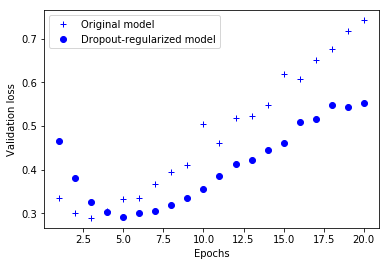

In [13]:
import matplotlib.pyplot as plt

dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()